<a href="https://colab.research.google.com/github/Columbia-Neuropythonistas/PythonDataCourse2021/blob/main/Lecture6-Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.style as mstl
from scipy.integrate import odeint
mstl.use('ggplot')
faces = fetch_lfw_people(min_faces_per_person=60)
np.random.seed(1996)

/opt/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def lorenz_neural(rho=28, sigma=10, beta=8/3, N=500):
    state0 = np.random.randn(3)

    def f(state, t):
        x, y, z = state
        return sigma * (y-x), x*(rho - z) - y, x*y - beta * z
    t = np.arange(0, 140.0, .01)
    states = odeint(f, state0, t),
    W = np.random.randn(3, N)
    neurons = states[0] @ W + 3*np.random.randn(states[0].shape[0], N)
    return states[0], neurons, t


Latents, neural_responses, time = lorenz_neural()

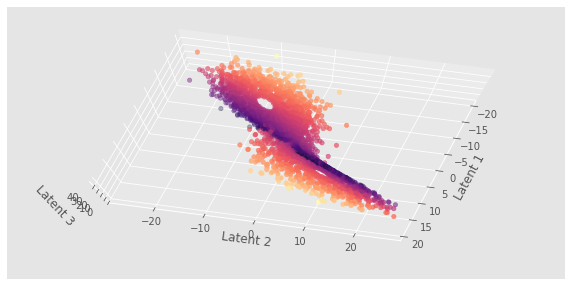

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca(projection='3d')
angle1, angle2 = (80, 15)
ax.view_init(angle1, angle2)
ax.scatter(Latents[::5, 0], Latents[::5, 1], Latents[::5, 2],
           c=Latents[::5, 2], cmap='magma')
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.set_zlabel('Latent 3')
plt.show()

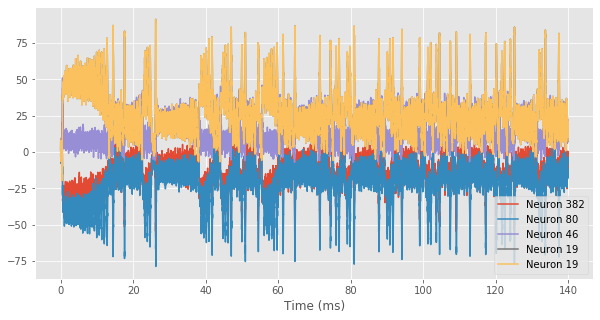

In [ ]:
nres = 5
neurons = np.random.randint(0, neural_responses.shape[1], nres).tolist()
plt.figure(figsize=(10, 5))
for neu in neurons:
    plt.plot(time, neural_responses[:, neu], label='Neuron {}'.format(neu + 1))
plt.legend()
plt.xlabel('Time (ms)')
plt.show()

In [ ]:
x_train, x_test = train_test_split(neural_responses)

In [ ]:
# from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 0, 'Principal Components')

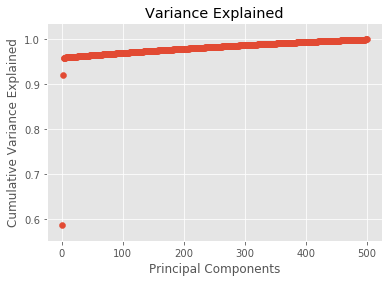

In [ ]:
plt.title('Variance Explained')
plt.scatter(np.arange(neural_responses.shape[1]) + 1,
            np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Cumulative Variance Explained')
plt.xlabel('Principal Components')

In [ ]:
next(i + 1 for i in range(neural_responses.shape[1])
     if np.cumsum(pca.explained_variance_ratio_)[i] >= .95)

3

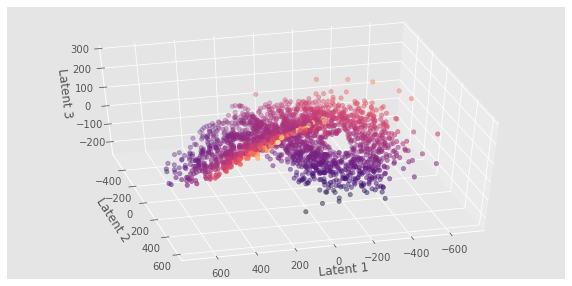

In [ ]:
transformed = pca.transform(x_train)
fig = plt.figure(figsize=(10, 5))
ax = fig.gca(projection='3d')
angle1, angle2 = (45, 75)
ax.view_init(angle1, angle2)
ax.scatter(transformed[::5, 0], transformed[::5, 1], transformed[::5, 2], c=transformed[::5, 2],cmap='magma')
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.set_zlabel('Latent 3')
plt.show()

In [ ]:
reconstructed = pca.inverse_transform(transformed)
print(np.allclose(x_train, reconstructed))

True


In [ ]:
pca = PCA(n_components=3)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# Manifold Learning

In [ ]:
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO WORLD', va='center', ha='center', weight='bold', size=35)
    fig.savefig('hello.png')
    plt.close(fig)
    
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]


def rotate(X, angle=45):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)


def make_curvy(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

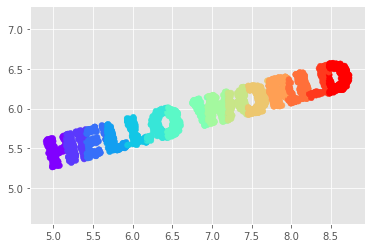

In [ ]:
X = make_hello(2500)
X = rotate(X, 15) + 5
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 15))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')
plt.show()

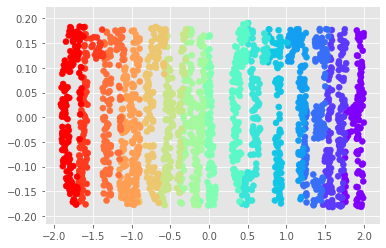

In [ ]:
pca = PCA()
transformed = pca.fit_transform(X)
plt.scatter(transformed[:, 0], transformed[:, 1], **colorize)
plt.show()

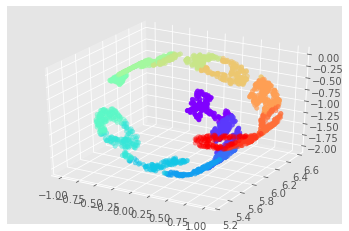

In [ ]:
X_nl = make_curvy(X)
ax = plt.axes(projection='3d')
ax.scatter3D(X_nl[:, 0], X_nl[:, 1], X_nl[:, 2],
             **colorize)
plt.show()

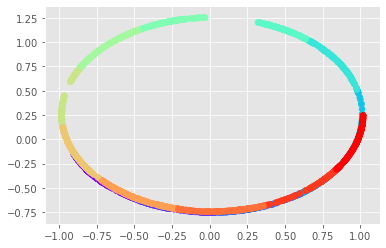

In [ ]:
pca = PCA()
transformed = pca.fit_transform(X_nl)
plt.scatter(transformed[:, 0], transformed[:, 1], **colorize)
plt.show()

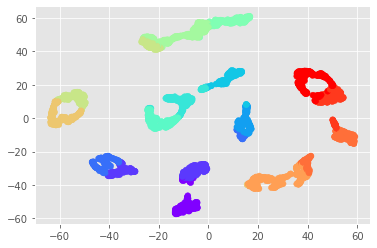

In [ ]:
#from sklearn.manifold import TSNE
tsne = TSNE()
transformed = tsne.fit_transform(X_nl)
plt.scatter(transformed[:, 0], transformed[:, 1], **colorize)
plt.show()

# Clustering

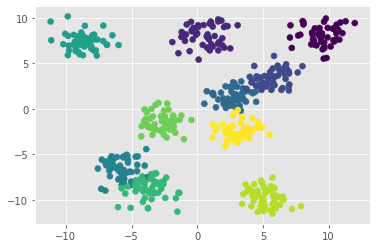

In [ ]:
X, Y = make_blobs(n_samples = 500, centers = 10, cluster_std = 1)
plt.scatter(X[:,0], X[:,1], c = Y)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

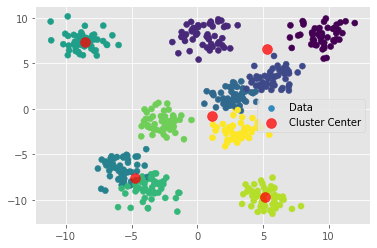

In [ ]:
plt.scatter(X[:,0], X[:,1], c = Y,label='Data')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', s = 100, alpha=.75, label='Cluster Center')
plt.legend()

In [ ]:
param_grid = {'n_clusters': [3,5,10,50]}
grid = GridSearchCV(KMeans(), param_grid=param_grid, scoring='adjusted_mutual_info_score')
grid.fit(X,Y)
print(grid.best_params_)
best_model = grid.best_estimator_

{'n_clusters': 10}


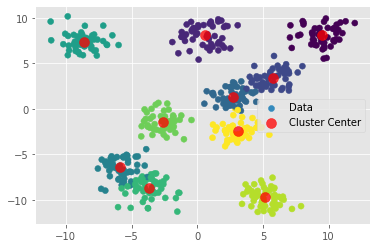

In [ ]:
plt.scatter(X[:,0], X[:,1], c = Y,label='Data')
plt.scatter(best_model.cluster_centers_[:,0], best_model.cluster_centers_[:,1],
            c='red', s = 100, alpha=.75, label='Cluster Center')
plt.legend()

# Pipelines

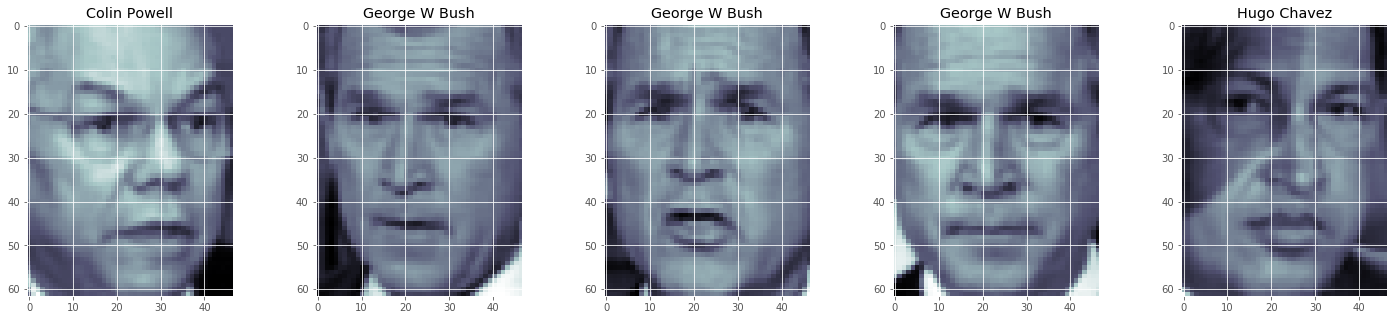

In [ ]:
n_images = 5
fig, axs = plt.subplots(1, n_images, figsize=(5*n_images, 5))
for label, image, ax in zip(faces.target[:n_images],
                            faces.images[:n_images], axs):
    ax.imshow(image, cmap='bone')
    ax.set_title(faces.target_names[label])

In [ ]:
pca = PCA()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target)
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

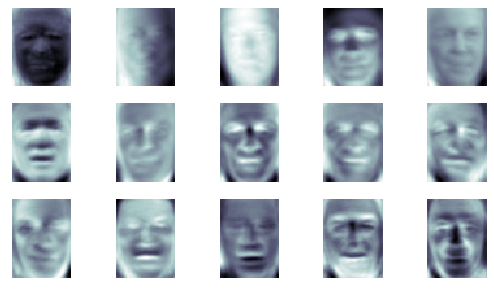

In [ ]:
collength = 5
rowlength = 3
fig, axs = plt.subplots(rowlength, collength, figsize=(3*rowlength, collength),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axs.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Text(0, 0.5, 'Cumulative  Variance Explained')

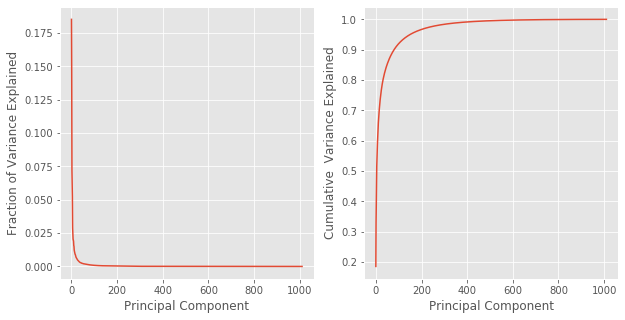

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(pca.explained_variance_ratio_)
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Fraction of Variance Explained')
ax[1].plot(np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Cumulative  Variance Explained')

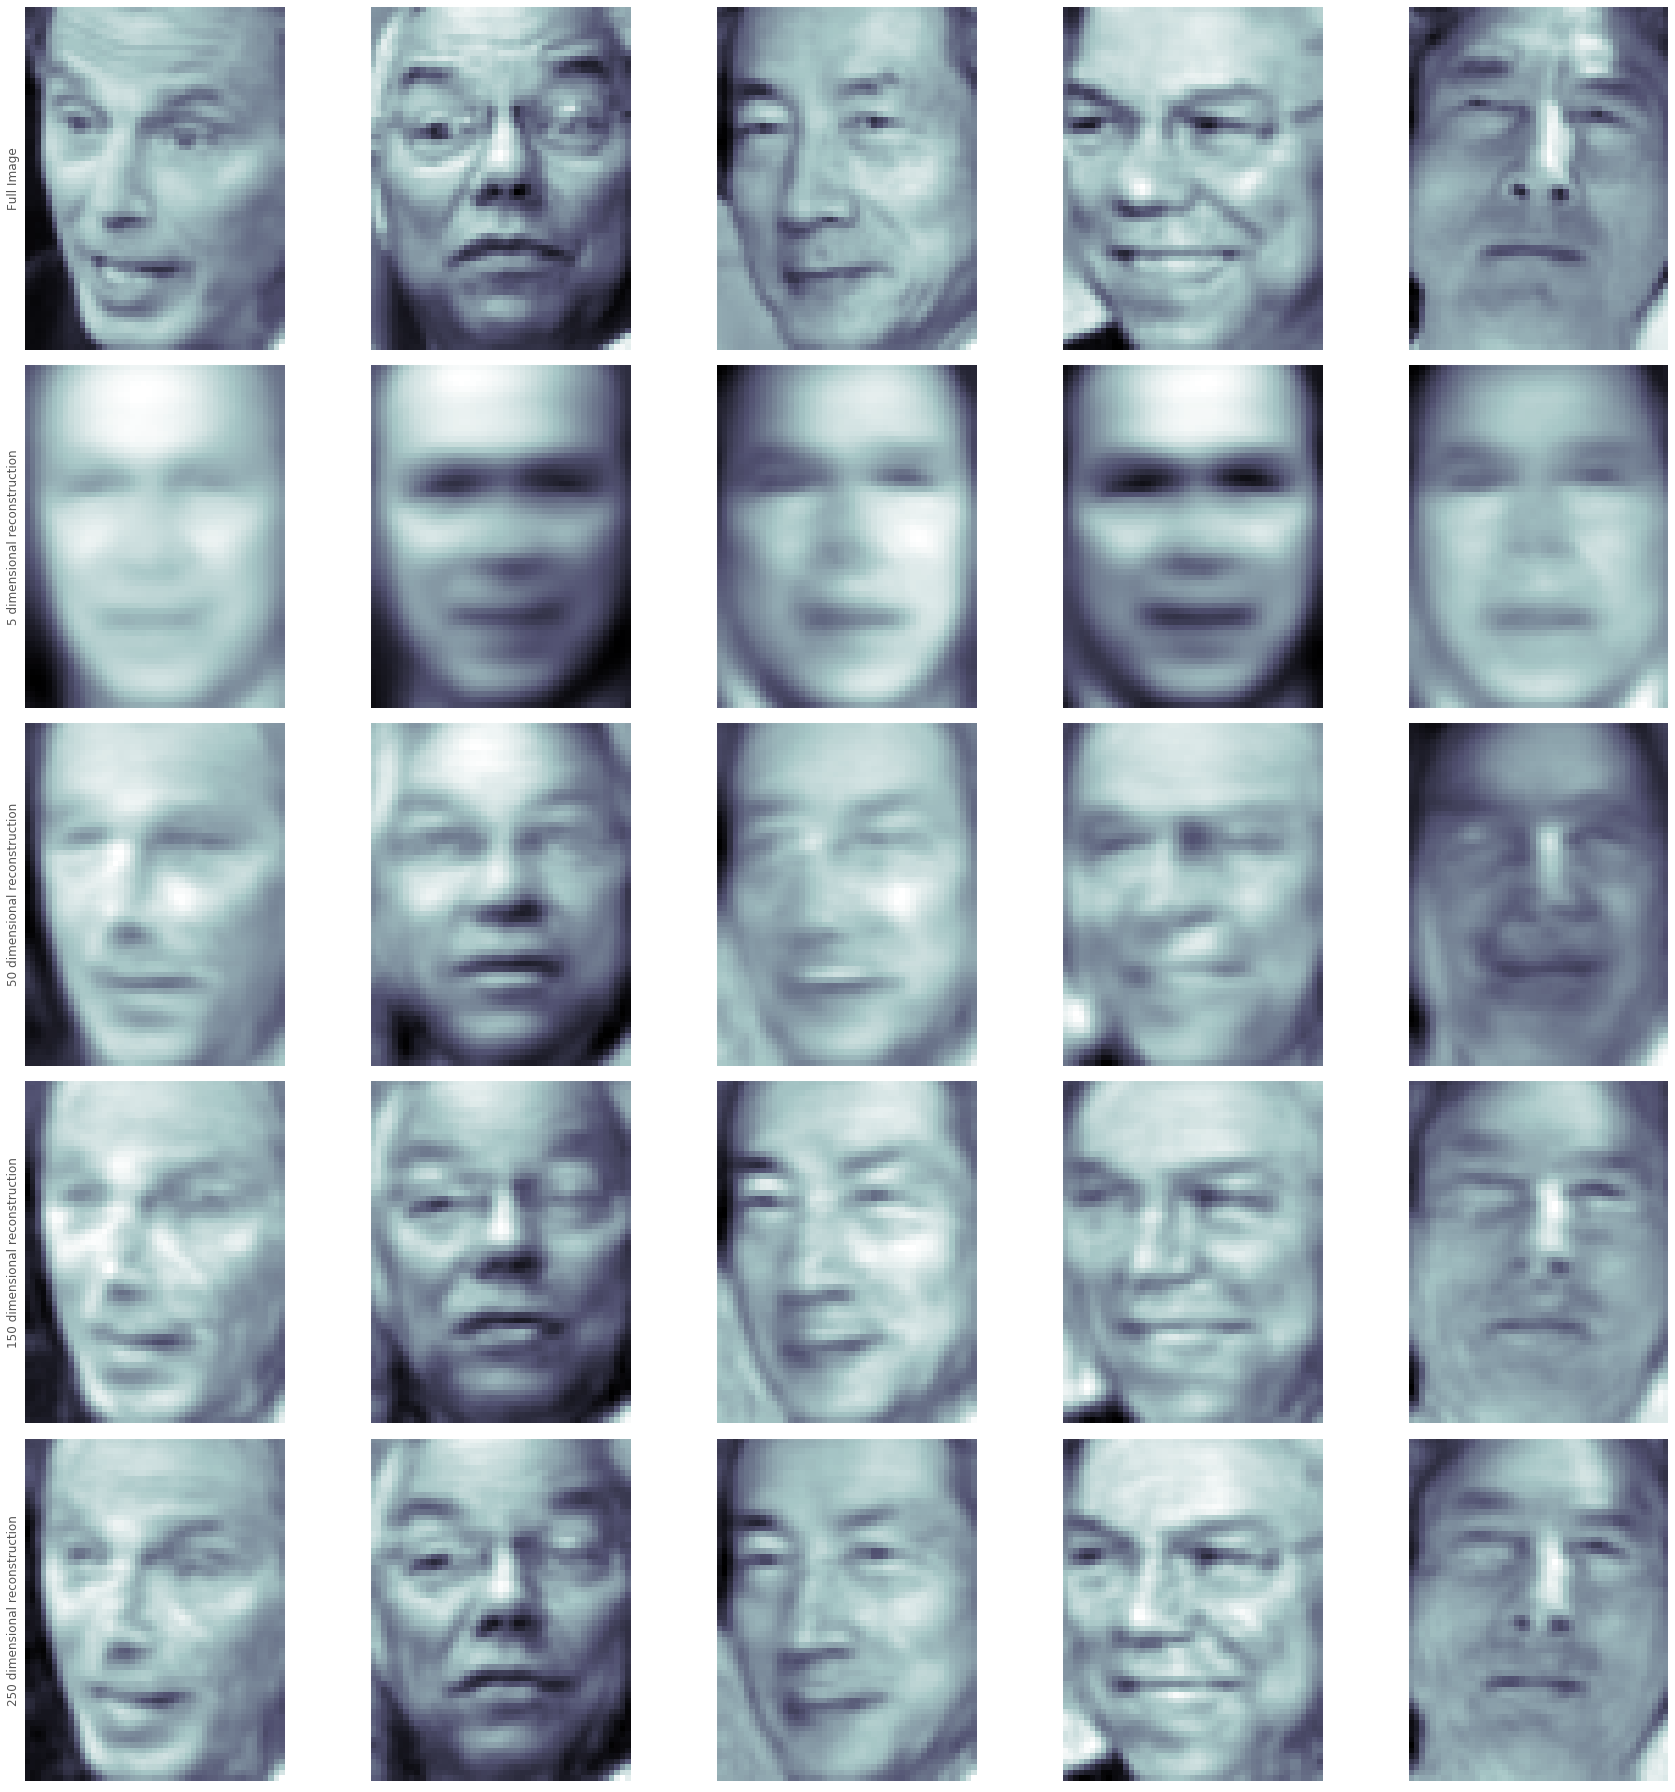

In [ ]:
npcs = [0, 5, 50, 150, 250]
nsamples = 5
idx = np.random.randint(0, faces.data.shape[0], nsamples)
fig, ax = plt.subplots(len(npcs), nsamples,
                       subplot_kw={'xticks': [], 'yticks': []},
                       figsize=(5*len(npcs), 5*nsamples))
for i, n_component in enumerate(npcs):
    if i != 0:
        pca = PCA(n_components=n_component)
        ax[i,0].set_ylabel('{} dimensional reconstruction'.format(n_component))
    else:
        pca = PCA()
        ax[i,0].set_ylabel('Full Image')
    pca.fit(Xtrain)
    latents = pca.transform(faces.data)
    reconstruction = pca.inverse_transform(latents)
    for j, p in enumerate(idx):
        if i == 0:
            ax[i, j].imshow(faces.data[p].reshape(62, 47), cmap='bone')
        else:
            ax[i, j].imshow(reconstruction[p].reshape(62, 47), cmap='bone')
plt.tight_layout()
plt.show()


In [ ]:
tsne = TSNE()
colorize = dict(c=faces.target, cmap=plt.cm.get_cmap('rainbow', 5))
t_latents = tsne.fit_transform(faces.data)

In [ ]:
plt.scatter(t_latents[:,0], t_latents[:,1], **colorize)

In [ ]:
colorize = dict(c=faces.target, cmap=plt.cm.get_cmap('rainbow', faces.target_names.shape[0]), label=faces.target_names[faces.target])

In [ ]:
faces.target_names.shape

In [ ]:
mypipeline = Pipeline([('pca_transform', PCA()),
                      ('classifier', SVC())])
paramgrid = {'pca_transform__n_components': np.arange(0, 150, 25)+1,
             'classifier__C': [1, 4, 10]}

grid_model = GridSearchCV(mypipeline, param_grid=paramgrid, n_jobs=5,
                          scoring='accuracy')
grid_model.fit(Xtrain, Ytrain)

In [ ]:
print(grid_model.best_params_)
best_model = grid_model.best_estimator_
print(best_model.score(Xtest, Ytest))

In [ ]:
best_model.score(Xtrain, Ytrain)

# Gollub Data

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Columbia-Neuropythonistas/PythonDataCourse2021/master/Lecture5/CancerData/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Columbia-Neuropythonistas/PythonDataCourse2021/master/Lecture5/CancerData/test.csv')